In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import plotly
plotly.tools.set_credentials_file(username='8135tao', api_key='wyGWY4LmNGNohXtJ3vmo')
import plotly.plotly as py
from scipy.stats import linregress
import plotly.graph_objs as go


In [3]:
total_expo_bystate_df=pd.read_csv('DATA_Exports_of_NAICS_Total_All_Merchandise_to_World.csv')

list_of_state1 = set(total_expo_bystate_df['State'])

total_expo_bystate_df_sorted = total_expo_bystate_df.sort_values(by=['State'])
total_expo_bystate_df_sorted=total_expo_bystate_df_sorted.set_index('State')

len(list_of_state1)


55

In [4]:
total_expo_bystate_df['State']=total_expo_bystate_df['State'].str.lstrip()
total_expo_bystate_df=total_expo_bystate_df.rename(index=str, columns={"State": "state"})
total_expo_bystate_df.head()

,state,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,UNITED STATES,1.148200e+12,1.287440e+12,1.056040e+12,1.278490e+12,1.482510e+12,1.545820e+12,1.578520e+12,1.621870e+12,1.503330e+12,1.451020e+12,1.546270e+12
1,Texas,1.682290e+11,1.922220e+11,1.629950e+11,2.069920e+11,2.511040e+11,2.646650e+11,2.777160e+11,2.855590e+11,2.487800e+11,2.313100e+11,2.645410e+11
2,California,1.343190e+11,1.448060e+11,1.200800e+11,1.432080e+11,1.594210e+11,1.617570e+11,1.681920e+11,1.738690e+11,1.653600e+11,1.634390e+11,1.720120e+11
3,New York,7.111580e+10,8.138574e+10,5.874303e+10,6.968494e+10,8.499935e+10,8.133751e+10,8.640715e+10,8.883433e+10,8.312455e+10,7.669018e+10,7.791456e+10
4,Washington,5.208948e+10,5.449805e+10,5.185086e+10,5.334533e+10,6.480027e+10,7.565431e+10,8.162998e+10,9.055827e+10,8.637468e+10,7.955346e+10,7.641374e+10


#Coloropleth map

In [5]:
cloro_df = pd.read_csv("2011_us_ag_exports.csv")
cloro_df.head()

,code,state,category,total exports,beef,pork,poultry,dairy,fruits fresh,fruits proc,total fruits,veggies fresh,veggies proc,total veggies,corn,wheat,cotton
0,AL,Alabama,state,1390.63,34.4,10.6,481.0,4.06,8.0,17.1,25.11,5.5,8.9,14.33,34.9,70.0,317.61
1,AK,Alaska,state,13.31,0.2,0.1,0.0,0.19,0.0,0.0,0.00,0.6,1.0,1.56,0.0,0.0,0.00
2,AZ,Arizona,state,1463.17,71.3,17.9,0.0,105.48,19.3,41.0,60.27,147.5,239.4,386.91,7.3,48.7,423.95
3,AR,Arkansas,state,3586.02,53.2,29.4,562.9,3.53,2.2,4.7,6.88,4.4,7.1,11.45,69.5,114.5,665.44
4,CA,California,state,16472.88,228.7,11.1,225.4,929.95,2791.8,5944.6,8736.40,803.2,1303.5,2106.79,34.6,249.3,1064.95


In [6]:
cloro_df['state']=cloro_df['state'].str.lstrip()


In [7]:
list_of_state2 = set(cloro_df['state'])
#list_of_state2

In [8]:
inter_states = list_of_state1&list_of_state2



In [9]:
total_expo_bystate_df = total_expo_bystate_df[total_expo_bystate_df['state'].isin(inter_states) ]    

total_expo_bystate_df['mean'] = total_expo_bystate_df.loc[:, '2007':'2016'].mean(axis=1)

total_expo_bystate_df.head()

,state,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,mean
1,Texas,1.682290e+11,1.922220e+11,1.629950e+11,2.069920e+11,2.511040e+11,2.646650e+11,2.777160e+11,2.855590e+11,2.487800e+11,2.313100e+11,2.645410e+11,2.289572e+11
2,California,1.343190e+11,1.448060e+11,1.200800e+11,1.432080e+11,1.594210e+11,1.617570e+11,1.681920e+11,1.738690e+11,1.653600e+11,1.634390e+11,1.720120e+11,1.534451e+11
3,New York,7.111580e+10,8.138574e+10,5.874303e+10,6.968494e+10,8.499935e+10,8.133751e+10,8.640715e+10,8.883433e+10,8.312455e+10,7.669018e+10,7.791456e+10,7.823226e+10
4,Washington,5.208948e+10,5.449805e+10,5.185086e+10,5.334533e+10,6.480027e+10,7.565431e+10,8.162998e+10,9.055827e+10,8.637468e+10,7.955346e+10,7.641374e+10,6.903547e+10
5,Illinois,4.889625e+10,5.367748e+10,4.162611e+10,5.006071e+10,6.490290e+10,6.815788e+10,6.621289e+10,6.839400e+10,6.336869e+10,5.968098e+10,6.518697e+10,5.849779e+10


In [10]:
total_expo_bystate_mean_df = total_expo_bystate_df[['state','mean']]
total_expo_bystate_mean_df.loc[:,'mean'] = total_expo_bystate_mean_df.loc[:,'mean']/(10**9)


total_expo_bystate_mean_df = total_expo_bystate_mean_df.sort_values(by=['state']).reset_index(drop=True)
total_expo_bystate_mean_df['code'] = cloro_df['code']
total_expo_bystate_mean_df = total_expo_bystate_mean_df.sort_values(by=['mean'],ascending=False).reset_index(drop=True)
total_expo_bystate_mean_df.loc[:,'mean'] = total_expo_bystate_mean_df.loc[:,'mean'].round(2)

total_expo_bystate_mean_df.to_csv('Total export by state.csv',index=False)
total_expo_bystate_mean_df.head()


C:\Users\8135t\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,state,mean,code
0,Texas,228.96,TX
1,California,153.45,CA
2,New York,78.23,NY
3,Washington,69.04,WA
4,Illinois,58.50,IL


In [11]:


for col in total_expo_bystate_mean_df.columns:
    total_expo_bystate_mean_df[col] = total_expo_bystate_mean_df[col].astype(str)

# scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
#             [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# scl = [[0.0, 'rgb(220,110,110)'],[0.2, 'rgb(180,90,90)'],[0.4, 'rgb(150,75,75)'],\
#             [0.6, 'rgb(120,60,60)'],[0.8, 'rgb(100,50,50)'],[1.0, 'rgb(50,25,25)']]

scl = [[0.0, 'rgb(220,110,110)'],[0.25, 'rgb(100,50,50)'],[1.0, 'rgb(50,25,25)']]

total_expo_bystate_mean_df['text'] = total_expo_bystate_mean_df['state'] + '<br>' +\
    'Average Export $'+total_expo_bystate_mean_df['mean']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        #locations = df['code'],
        locations = total_expo_bystate_mean_df['code'],
        #z = df['total exports'].astype(float),
        z = total_expo_bystate_mean_df['mean'].astype(float),
        locationmode = 'USA-states',
        text = total_expo_bystate_mean_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Billions USD"
        )
    ) ]

layout = dict(
        title = '2007-2017 Average Total Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig = dict(data=data, layout=layout)

#url = py.plot(fig, filename='d3-cloropleth-map')



In [12]:
#py.iplot(fig, filename = 'd3-cloropleth-map')


#Scatter Plot

In [13]:
#total_expo_bystate_df
total_expo_bycountry_df = pd.read_csv("DATA_Exports_of_NAICS_Total_All_Merchandise.csv")
total_expo_bycountry_df = total_expo_bycountry_df.loc[(total_expo_bycountry_df.loc[:,'2007':'2016'].T !=0).any()].reset_index(drop=True)
total_expo_bycountry_df.head()
#.any() check each column, if any element in that column is true, return ture for that column

,Partner,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,World,1.148200e+12,1.287440e+12,1.056040e+12,1.278490e+12,1.482510e+12,1.545820e+12,1.578520e+12,1.621870e+12,1.503330e+12,1.451020e+12,1.546270e+12
1,Canada,2.488880e+11,2.611500e+11,2.046580e+11,2.492560e+11,2.812920e+11,2.926510e+11,3.007550e+11,3.128170e+11,2.808550e+11,2.667340e+11,2.822650e+11
2,Mexico,1.359180e+11,1.512200e+11,1.288920e+11,1.636650e+11,1.982890e+11,2.158750e+11,2.259540e+11,2.410070e+11,2.364600e+11,2.300510e+11,2.433140e+11
3,China,6.293689e+10,6.973284e+10,6.949668e+10,9.191108e+10,1.041220e+11,1.105170e+11,1.217460e+11,1.236570e+11,1.158730e+11,1.155460e+11,1.298940e+11
4,Japan,6.115958e+10,6.514175e+10,5.113418e+10,6.047185e+10,6.579974e+10,6.997579e+10,6.523741e+10,6.689184e+10,6.238781e+10,6.322608e+10,6.760508e+10


In [30]:
mean_10_year = total_expo_bycountry_df.loc[:, '2007':'2016'].mean(axis=1)
mean_10_year_237_counttries_export = np.mean(mean_10_year[1:])
mean_10_year_237_counttries_export

5912393798.919917

In [18]:
list_of_countries = set(total_expo_bycountry_df['Partner'][1:].astype(str))

len(list_of_countries)

236

In [19]:
gdp_df = pd.read_csv('gdp_csv.csv')
gdp_df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


In [20]:
gdp_06_17_df = gdp_df[gdp_df['Year'] > 2006 ].reset_index(drop=True)

gdp_06_17_df.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,2007,1.637573e+12
1,Arab World,ARB,2008,2.078116e+12
2,Arab World,ARB,2009,1.795820e+12
3,Arab World,ARB,2010,2.109646e+12
4,Arab World,ARB,2011,2.501554e+12


In [21]:
list_of_countries_and_regions = set(gdp_06_17_df.loc[:,'Country Name'])

intersection_export_gdp =list_of_countries_and_regions&list_of_countries
len(intersection_export_gdp)

#difference_countries_gdp =list_of_countries_and_regions - list_of_countries
#difference_countries_gdp

# L = [country for country in difference_countries_gdp]
# temp_df = pd.DataFrame({'col':L})
# temp_df.to_csv("missing countries.csv")


186

In [22]:

gdp_06_17_country_df=gdp_06_17_df[gdp_06_17_df['Country Name'].isin(intersection_export_gdp) ].reset_index(drop=True)
    
len(gdp_06_17_country_df)

1812

In [23]:
ten_year_data=pd.DataFrame(gdp_06_17_country_df.groupby(['Country Name']).count() ['Value'] == 10)
ten_year_data =ten_year_data.loc[ ten_year_data['Value'] == True]
ten_year_data.reset_index(inplace = True)

ten_year_data_country = set(ten_year_data['Country Name'])
ten_year_gdp_06_17_country_df = gdp_06_17_country_df[gdp_06_17_country_df['Country Name'].isin(ten_year_data_country) ].reset_index(drop=True)
len(ten_year_gdp_06_17_country_df)

1710

In [24]:
gpbycountry_gdp = ten_year_gdp_06_17_country_df.groupby(['Country Name','Year'], as_index=False)
mean_gdp_by_country=gpbycountry_gdp.mean().groupby('Country Name')['Value'].mean()


mean_gdp_by_country_df = pd.DataFrame(mean_gdp_by_country)

mean_gdp_by_country_df = mean_gdp_by_country_df.reset_index(drop=False)

mean_gdp_by_country_df= mean_gdp_by_country_df.rename(index=str, columns={"Value": "mean gdp"})

mean_gdp_by_country_df.sort_values(by=['mean gdp'],ascending=False).head()
#mean_gdp_by_country_df.head()

,Country Name,mean gdp
33,China,7.784747e+12
73,Japan,5.217301e+12
54,Germany,3.582563e+12
162,United Kingdom,2.736682e+12
51,France,2.702817e+12


In [25]:
ten_year_country_expo_df = total_expo_bycountry_df [total_expo_bycountry_df['Partner'].isin(ten_year_data_country)].loc[:,'Partner':'2016']
ten_year_country_expo_df = ten_year_country_expo_df.reset_index(drop=True)
ten_year_country_expo_df['mean export'] = ten_year_country_expo_df.loc[:, '2007':'2016'].mean(axis=1)


ten_year_country_expo_mean_df = ten_year_country_expo_df[['Partner','mean export']]
ten_year_country_expo_mean_df.loc[:,'mean export'] = ten_year_country_expo_mean_df.loc[:,'mean export'].round(2)

ten_year_country_expo_mean_df=ten_year_country_expo_mean_df.rename(index=str, columns={"Partner": "Country Name"})
ten_year_country_expo_mean_df.sort_values(by=['mean export'],ascending=False).head()

C:\Users\8135t\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Country Name,mean export
0,Canada,2.699056e+11
1,Mexico,1.927331e+11
2,China,9.855385e+10
3,Japan,6.314260e+10
4,United Kingdom,5.211265e+10


In [31]:
print(np.mean(ten_year_country_expo_mean_df['mean export']))
print(mean_10_year_237_counttries_export)

7619612304.411113
5912393798.919917


In [32]:
stats.ttest_1samp(ten_year_country_expo_mean_df['mean export'],mean_10_year_237_counttries_export)

Ttest_1sampResult(statistic=0.8095224175212549, pvalue=0.419346324679045)

In [33]:
total_impo_bycountry_df = pd.read_csv("DATA_Imports_of_NAICS_Total_All_Merchandise.csv")
total_impo_bycountry_df.head()

,Partner,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,World,1.956960e+12,2.103640e+12,1.559620e+12,1.913860e+12,2.207950e+12,2.276270e+12,2.267990e+12,2.356360e+12,2.248810e+12,2.187600e+12,2.341960e+12
1,China,3.214430e+11,3.377730e+11,2.963740e+11,3.649530e+11,3.993710e+11,4.256190e+11,4.404300e+11,4.684750e+11,4.832020e+11,4.625420e+11,5.054700e+11
2,Mexico,2.107140e+11,2.159420e+11,1.766540e+11,2.299860e+11,2.628740e+11,2.775940e+11,2.805560e+11,2.957300e+11,2.964330e+11,2.939240e+11,3.142670e+11
3,Canada,3.170570e+11,3.394910e+11,2.262480e+11,2.776370e+11,3.153250e+11,3.242630e+11,3.325040e+11,3.492860e+11,2.963050e+11,2.777820e+11,2.993190e+11
4,Japan,1.454630e+11,1.392620e+11,9.580368e+10,1.205520e+11,1.289280e+11,1.464320e+11,1.385750e+11,1.345050e+11,1.314450e+11,1.320300e+11,1.364810e+11


In [34]:
mean_10_year_import = total_impo_bycountry_df.loc[:, '2007':'2016'].mean(axis=1)
mean_10_year_237_counttries_import = np.mean(mean_10_year_import[1:])


8856748292.931515

In [36]:
ten_year_country_impo_df = total_impo_bycountry_df [total_impo_bycountry_df['Partner'].isin(ten_year_data_country)].loc[:,'Partner':'2016']
ten_year_country_impo_df = ten_year_country_impo_df.reset_index(drop=True)
ten_year_country_impo_df['mean import'] = ten_year_country_impo_df.loc[:, '2007':'2016'].mean(axis=1)

ten_year_country_impo_mean_df = ten_year_country_impo_df[['Partner','mean import']]
ten_year_country_impo_mean_df.loc[:,'mean import'] = ten_year_country_impo_mean_df.loc[:,'mean import'].round(2)
ten_year_country_impo_mean_df=ten_year_country_impo_mean_df.rename(index=str, columns={"Partner": "Country Name"})

ten_year_country_impo_mean_df.sort_values(by=['mean import'],ascending=False).head()

C:\Users\8135t\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Country Name,mean import
0,China,4.000182e+11
2,Canada,3.055898e+11
1,Mexico,2.540407e+11
3,Japan,1.312996e+11
4,Germany,1.031039e+11


In [38]:
print(np.mean(ten_year_country_impo_mean_df['mean import']))
print(mean_10_year_237_counttries_import)

11532934975.376612
8856748292.931515


In [37]:
stats.ttest_1samp(ten_year_country_impo_mean_df['mean import'],mean_10_year_237_counttries_import)

Ttest_1sampResult(statistic=0.7812811298206276, pvalue=0.4357238336538899)

In [39]:
len(ten_year_country_impo_mean_df)

171

In [41]:
merged_df = pd.merge( pd.merge(ten_year_country_expo_mean_df,
                               ten_year_country_impo_mean_df,
                               on='Country Name'),
                      mean_gdp_by_country_df,
                      on='Country Name')
merged_df['mean balance']=merged_df['mean export']-merged_df['mean import']

merged_df.to_csv('mean_impo_expo_gdp_country.csv',index=False)

print(len(merged_df))
merged_df.head()

171


,Country Name,mean export,mean import,mean gdp,mean balance
0,Canada,2.699056e+11,3.055898e+11,1.632974e+12,-3.568420e+10
1,Mexico,1.927331e+11,2.540407e+11,1.120824e+12,-6.130760e+10
2,China,9.855385e+10,4.000182e+11,7.784747e+12,-3.014644e+11
3,Japan,6.314260e+10,1.312996e+11,5.217301e+12,-6.815696e+10
4,United Kingdom,5.211265e+10,5.387572e+10,2.736682e+12,-1.763073e+09


R^2 value is 0.6365107068842307
p value is 5.566150446169253e-39


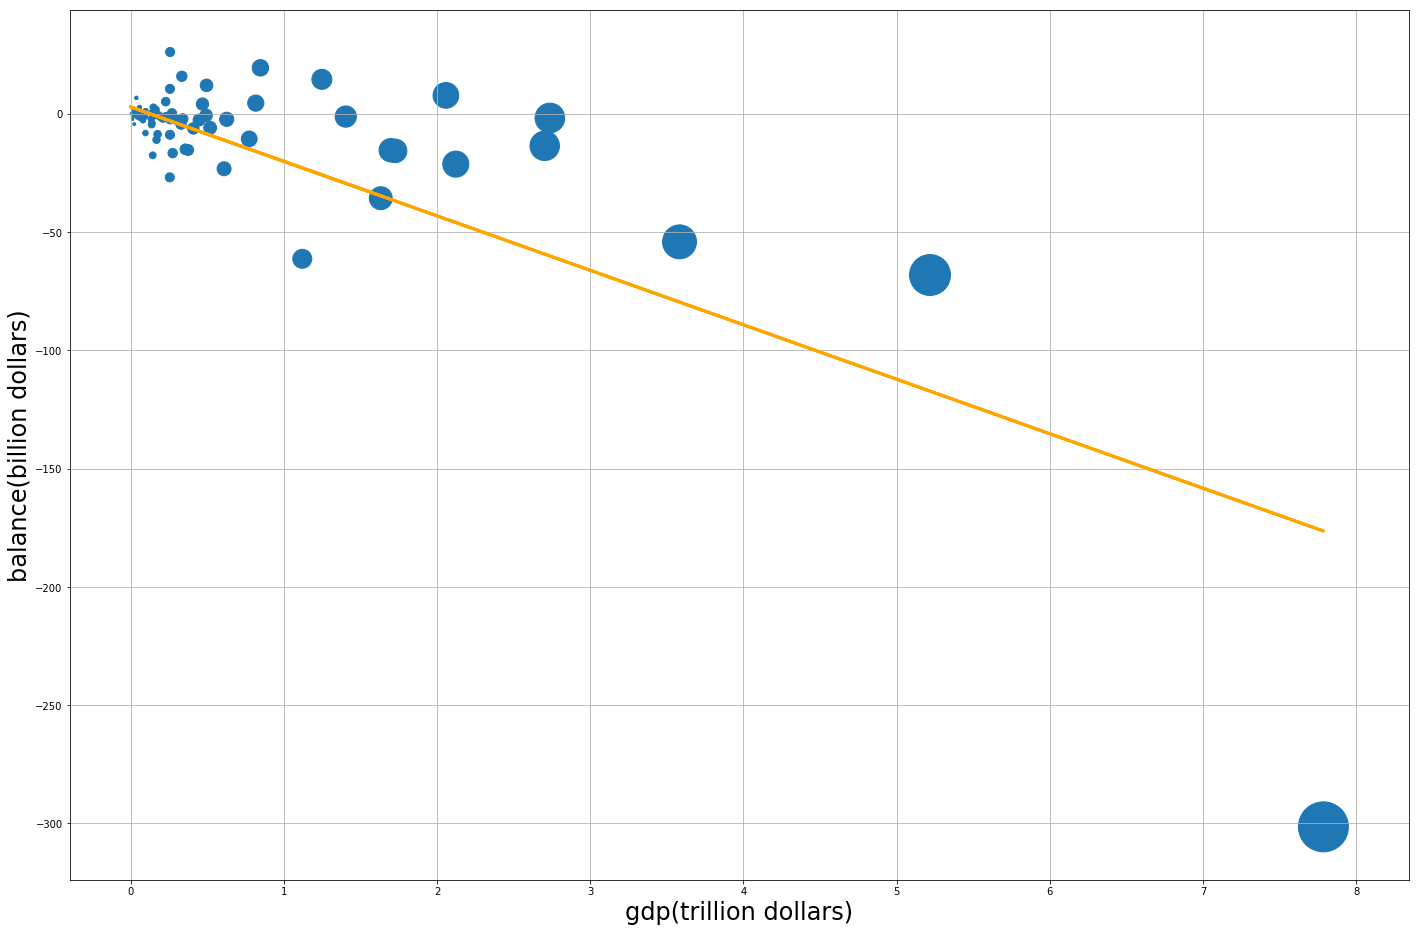

In [42]:

x_axis= np.array(merged_df['mean gdp'])/10**12

y_axis=np.array(merged_df['mean balance'])/10**9


max_x = max(x_axis)
max_y = max(y_axis)


(slope, intercept, rvalue , pvalue , _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept

print(f'R^2 value is {rvalue**2}')
print(f'p value is {pvalue}')

fig, ax = plt.subplots(1,1,figsize=(24,16))




ax.plot(x_axis,fit
        ,'orange'
        ,linewidth=3)

ax.scatter( x_axis
           ,y_axis
           ,s=2500*x_axis/max_x
          )


ax.set_xlabel("gdp(trillion dollars)",fontsize=24)
ax.set_ylabel("balance(billion dollars)",fontsize=24)
ax.grid()
plt.show()

In [43]:

trace = go.Scatter(
    x = x_axis,
    y = y_axis,
    mode = 'markers'
)
trace2 = go.Scatter(
                  x=x_axis,
                  y=fit,
                  mode='lines',
                  name='Fit'
                  )
data = [trace,trace2]



In [39]:
# Plot and embed in ipython notebook!
#py.iplot(data, filename='basic-scatter')